## Contours

Contours can be defined as a curve joining the continous points(along the boundary), having the same color or intensity.

Point to be noted:

**For better accuracy use binary images, so before finding contours apply threshold or canny edge detection.**


In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Highway')

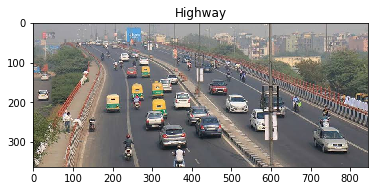

In [2]:
image = cv.imread('pics/road.jpeg')
plt.imshow(cv.cvtColor(image, cv.COLOR_RGB2BGR))
plt.title("Highway")

Number of contours foundin canny = 2381
Number of contours found in threshold = 2778


Text(0.5, 1, 'Contours with threshold')

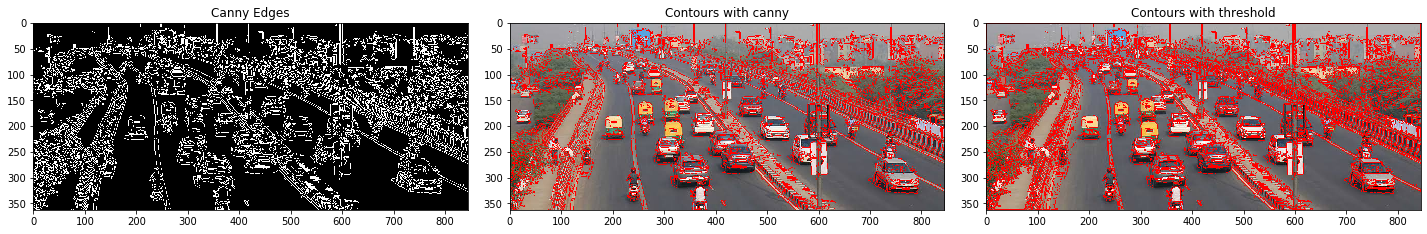

In [3]:
gray_image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
fig.tight_layout()

## Canny
edge = cv.Canny(gray_image, 30, 200)
ax[0].imshow(cv.cvtColor(edge, cv.COLOR_RGB2BGR))
ax[0].set_title("Canny Edges")

## Finding contours
contours, hierarchy = cv.findContours(edge.copy(), cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
print("Number of contours foundin canny = {}".format(len(contours)))

## Draw the contours
cv.drawContours(image, contours, -1, (0, 0, 255, 3))
ax[1].imshow(cv.cvtColor(image, cv.COLOR_RGB2BGR))
ax[1].set_title("Contours with canny")

## Binary threshold
ret, threshold = cv.threshold(gray_image, 127, 255, 3)
contours_2, hierarchy = cv.findContours(threshold, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
print("Number of contours found in threshold = {}".format(len(contours_2)))

## Draw the contours
cv.drawContours(image, contours_2, -1, (0, 0, 255, 3))
ax[2].imshow(cv.cvtColor(image, cv.COLOR_RGB2BGR))
ax[2].set_title("Contours with threshold")




## Sorting contours

Text(0.5, 1.0, 'Some shapes')

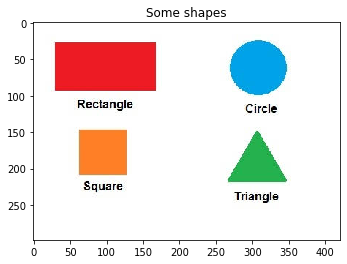

In [4]:
image = cv.imread('pics/shapes.jpeg')
plt.imshow(cv.cvtColor(image, cv.COLOR_RGB2BGR))
plt.title("Some shapes")

Number of contours foundin canny = 67


Text(0.5, 1, 'All Contours')

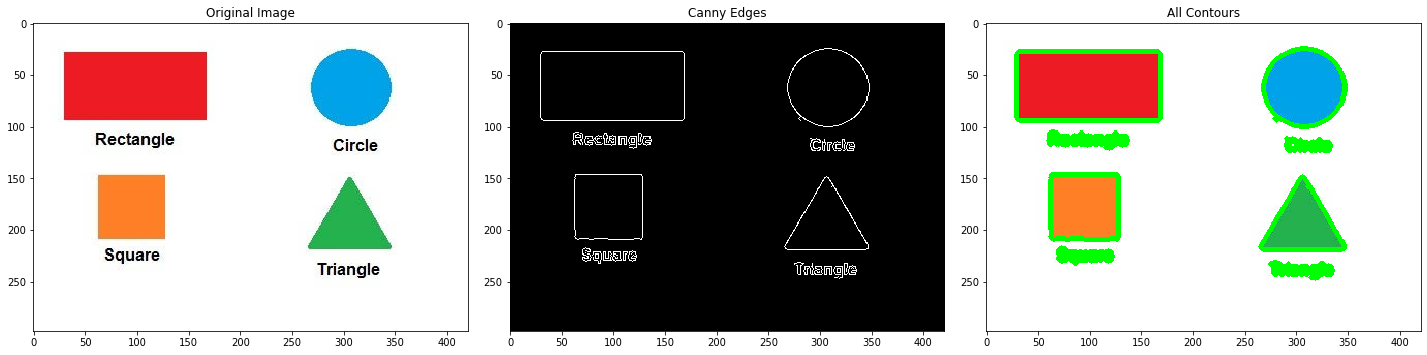

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
fig.tight_layout()

ax[0].imshow(cv.cvtColor(image, cv.COLOR_RGB2BGR))
ax[0].set_title("Original Image")

blank_image = np.zeros((image.shape[0], image.shape[1], 3))
original_image = image
gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
edges = cv.Canny(gray,50,200)
ax[1].imshow(cv.cvtColor(edges, cv.COLOR_RGB2BGR))
ax[1].set_title("Canny Edges")

## Finding contours
contours, hierarchy = cv.findContours(edges.copy(), cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
print("Number of contours foundin canny = {}".format(len(contours)))

## Draw the contours
cv.drawContours(image, contours, -1, (0, 255, 0), 3)
ax[2].imshow(cv.cvtColor(image, cv.COLOR_RGB2BGR))
ax[2].set_title("All Contours")
